Lets start by creating a simple regression model with the highest correlation coefficient to price. 

In [386]:
# imoprt libraries
import pandas as pd
import statsmodels.api as sm

In [387]:
# Read file 
filepath = "../data/kc_house_data.csv"
king = pd.read_csv(filepath)

king.head(3)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  

[3 rows x 25 columns]

In [388]:
king.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [389]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living']]

# Create a model
first_model = sm.OLS(y, sm.add_constant(X))
first_model_results = first_model.fit()

# Print the results
print(first_model_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:07:26   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $560. 
4. The model represents about %37 of the variance in price.
5. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-7.443e+04.  

Lets Determine RMSE for this model since the variance is not so great. 

In [390]:
rmse = ((first_model_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

711303.9200126047

our model is off by about $711,303 in a given prediction. Which is not good at all

Lets incorporate our second highest correlation variable and see if it helps the model.

In [392]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living', 'sqft_above']]

# Create a model
second_model = sm.OLS(y, sm.add_constant(X))
second_model_results = second_model.fit()

# Print the results
print(second_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     8866.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:17:52   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.983e+05
Df Residuals:                   30152   BIC:                         8.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.486e+04   9863.317     -7.590      

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05 except sqft_above.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $557.
4. With every increase of 1 sqft in the general above ground area the model predicts that the price will increase by about $3
4. The model represents about %37 of the variance in price.
5. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-7.486e+04.  

Including sqft_above actually worsens the model which makes sense since sqft_above incorporate the living area already. This also explains the reason its not statistically significant also. This confirms that we should not consider this predictor given the date we have. The date correlates much better with living sqft. 

Create a model with third highest correlation with price. 

In [393]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living', 'bathrooms']]

# Create a model
third_model = sm.OLS(y, sm.add_constant(X))
third_model_results = third_model.fit()

# Print the results
print(third_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8875.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:22:56   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30152   BIC:                         8.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.598e+04   1.15e+04     -8.318      

In [394]:
rmse = ((third_model_results.resid ** 2).sum() / len(y)) ** 0.5
rmse

711157.785578154

1. The model is statistically significant with a F-statistic p-value below 0.05.
2. The models predictors are statistically significant with a t-statistic p-value below 0.05.
3. With every increase of 1 sqft in the living area the model predicts that the price will increase by about $541.
4. With every increase of 1 sqft in the general above ground area the model predicts that the price will increase by about $25,530.00
5. The model represents about %37 of the variance in price.
6. When the square footage of living space ("sqft_living") is zero, the predicted value of the "price" would be $-9.598e+04.
7. Our model is off by $711,157.00 in a given prediction. 

Overall it seems that bathrooms are significant for the model. After reviewing some google searches about King County and how adding bathrooms increases value $25,000 is a reasonable amount for that area.

Now lets visualize the results of the the model with the predictors. 

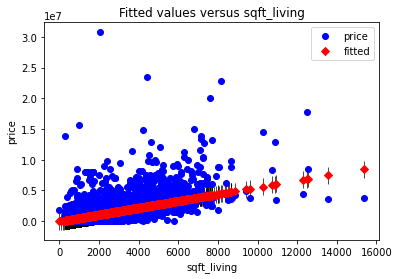

In [395]:
import matplotlib.pyplot as plt
%matplotlib inline
sm.graphics.plot_fit(third_model_results, "sqft_living")
plt.show()

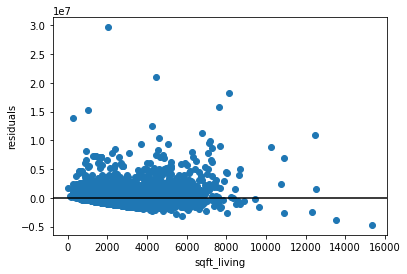

In [407]:
fig, ax = plt.subplots()

ax.scatter(king["sqft_living"], third_model_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

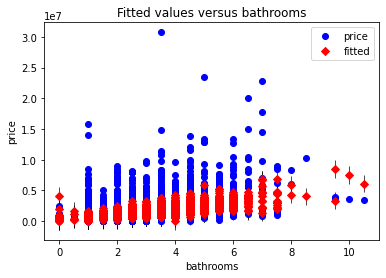

In [396]:
import matplotlib.pyplot as plt
%matplotlib inline
sm.graphics.plot_fit(third_model_results, "bathrooms")
plt.show()

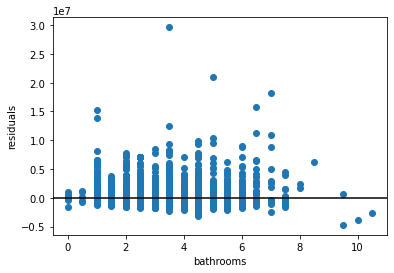

In [406]:
fig, ax = plt.subplots()

ax.scatter(king["bathrooms"], third_model_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("bathrooms")
ax.set_ylabel("residuals");

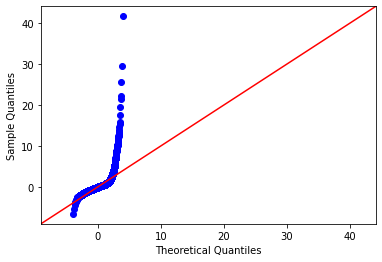

In [409]:
import scipy.stats as stats
sm.graphics.qqplot(third_model_results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

Lets attempt to include a third predictor being our next highest correlation to price.

I just realized that bathrooms should be treated as a categorical value. Is an increase of 2 bathrooms twice as much as an increase of 1 bathroom? It is hard to make sense to this so bathroom should be treated as a categorical value. Lets attempt to make the model using dummy variables instead. 

In [410]:
king.corr()['price']

id              -0.034184
price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [411]:
# Create a model with columns of interest only being sqft_living

# Specify the parameters for the model
y = king['price']
X = king[['sqft_living', 'bathrooms', 'sqft_patio']]

# Create a model
fourth_model = sm.OLS(y, sm.add_constant(X))
fourth_model_results = fourth_model.fit()

# Print the results
print(fourth_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     6074.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:02:22   Log-Likelihood:            -4.4897e+05
No. Observations:               30155   AIC:                         8.979e+05
Df Residuals:                   30151   BIC:                         8.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.42e+04   1.15e+04     -8.203      